## problem statement:- classify the quality of an apple 

## Importing the necessary libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import scipy.stats as ss
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.compose import ColumnTransformer
import pickle

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder,FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

# 2. data collection

In [2]:
# read the data set
data=pd.read_csv(r"C:\Users\LENOVO\Downloads\apple_quality.csv")

In [3]:
# make a copy of dataset
datac=data.copy()

In [4]:
datac

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


# 3.EDA for understanding the data 

In [5]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [6]:
## have null value
# and also needed to convert the data type of acidity because the data is in numeric

In [7]:
datac.duplicated().sum()

0

 there are no duplicated values

In [8]:
# check the data whether it is balanced or imbalanced data and it should be done on basis of class label.
datac["Quality"].value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

# 4.data cleaning

In [9]:
# dropping the row which contains null values
datac.drop(4000,axis=0,inplace=True)

In [10]:
# dropping the column which is not useful
datac.drop("A_id",axis=1,inplace=True)

In [11]:
# converting the datatype
datac["Acidity"]=datac["Acidity"].astype("float")

In [12]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 250.1+ KB


# 5.EDA

In [13]:
# describe the numerical data
datac.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [14]:
# extracting feaature variables and class variables
fea_var=datac.iloc[:,0:-1]
cl_var=datac.iloc[:,-1]

In [15]:
fea_var.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984


In [16]:
cl_var.head()

0    good
1    good
2     bad
3    good
4    good
Name: Quality, dtype: object

In [17]:
# mapping the values to categories
cl_var=cl_var.map({"good":1,"bad":0})

In [18]:
cl_var

0       1
1       1
2       0
3       1
4       1
       ..
3995    0
3996    1
3997    0
3998    1
3999    1
Name: Quality, Length: 4000, dtype: int64

In [19]:
# Before performing EDA we need to split the data because EDA should be performed on train dataset only so that the 
# test data will be unseened data

In [20]:
#splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(fea_var,cl_var,test_size=0.2,random_state=1,stratify=cl_var)

In [21]:
# from this x_train and y_train we need to perform the EDA to know more about the data
# for this firstly concate the x_train and y_train
d_eda=pd.concat([x_train,y_train],axis=1)

In [22]:
d_eda["Quality"]=d_eda["Quality"].map({1:"good",0:"bad"})

In [23]:
d_eda

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
1042,0.148672,-1.497965,-0.314322,-0.840648,3.563195,-1.603539,1.791805,good
3279,1.762092,2.050866,-1.375059,2.988179,-0.353031,-1.025432,3.200821,good
3736,-0.386819,0.957507,-0.315931,3.380672,-1.908308,-2.620454,0.022230,good
3019,-0.452303,-0.367928,-1.517538,1.842541,1.201533,0.492245,-0.844720,bad
1893,1.457536,-1.088102,-0.718263,-2.046923,2.717242,-0.235078,1.126991,good
...,...,...,...,...,...,...,...,...
3002,-1.123378,-1.396915,2.178745,1.077398,2.100609,0.293826,-0.600272,good
3243,1.572646,-0.281615,-4.380837,0.305577,2.274682,1.059189,-0.184645,bad
35,-0.955402,-2.461097,-4.087156,0.839108,1.003216,4.975640,-0.981388,bad
3207,-3.010790,-0.639898,-2.456271,-0.728441,0.553476,4.755782,-0.827881,bad


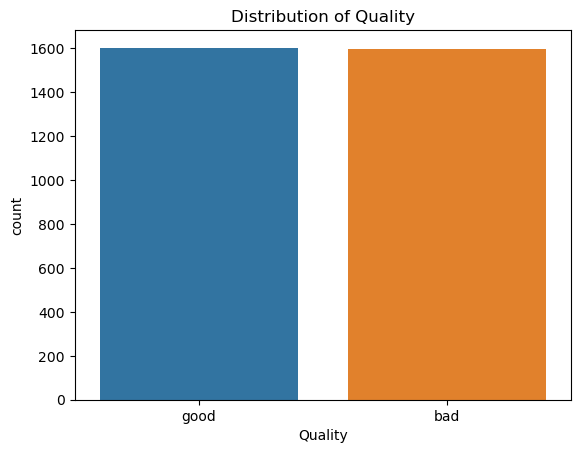

In [24]:
# plotting the graph to the distribution of quality
sns.countplot(x='Quality', data=d_eda)
plt.title('Distribution of Quality')
plt.show()

There are more number of apples which belongs to good quality

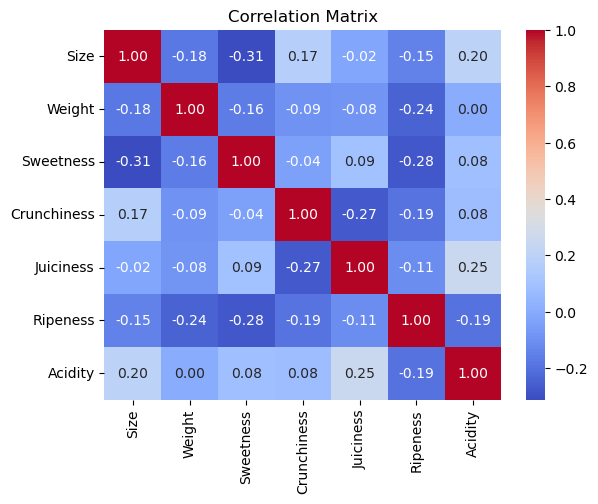

In [25]:
# plotting the heat map to know the relation between features
numeric_columns = d_eda.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = d_eda[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

each column is not related to each other there is no corelation

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


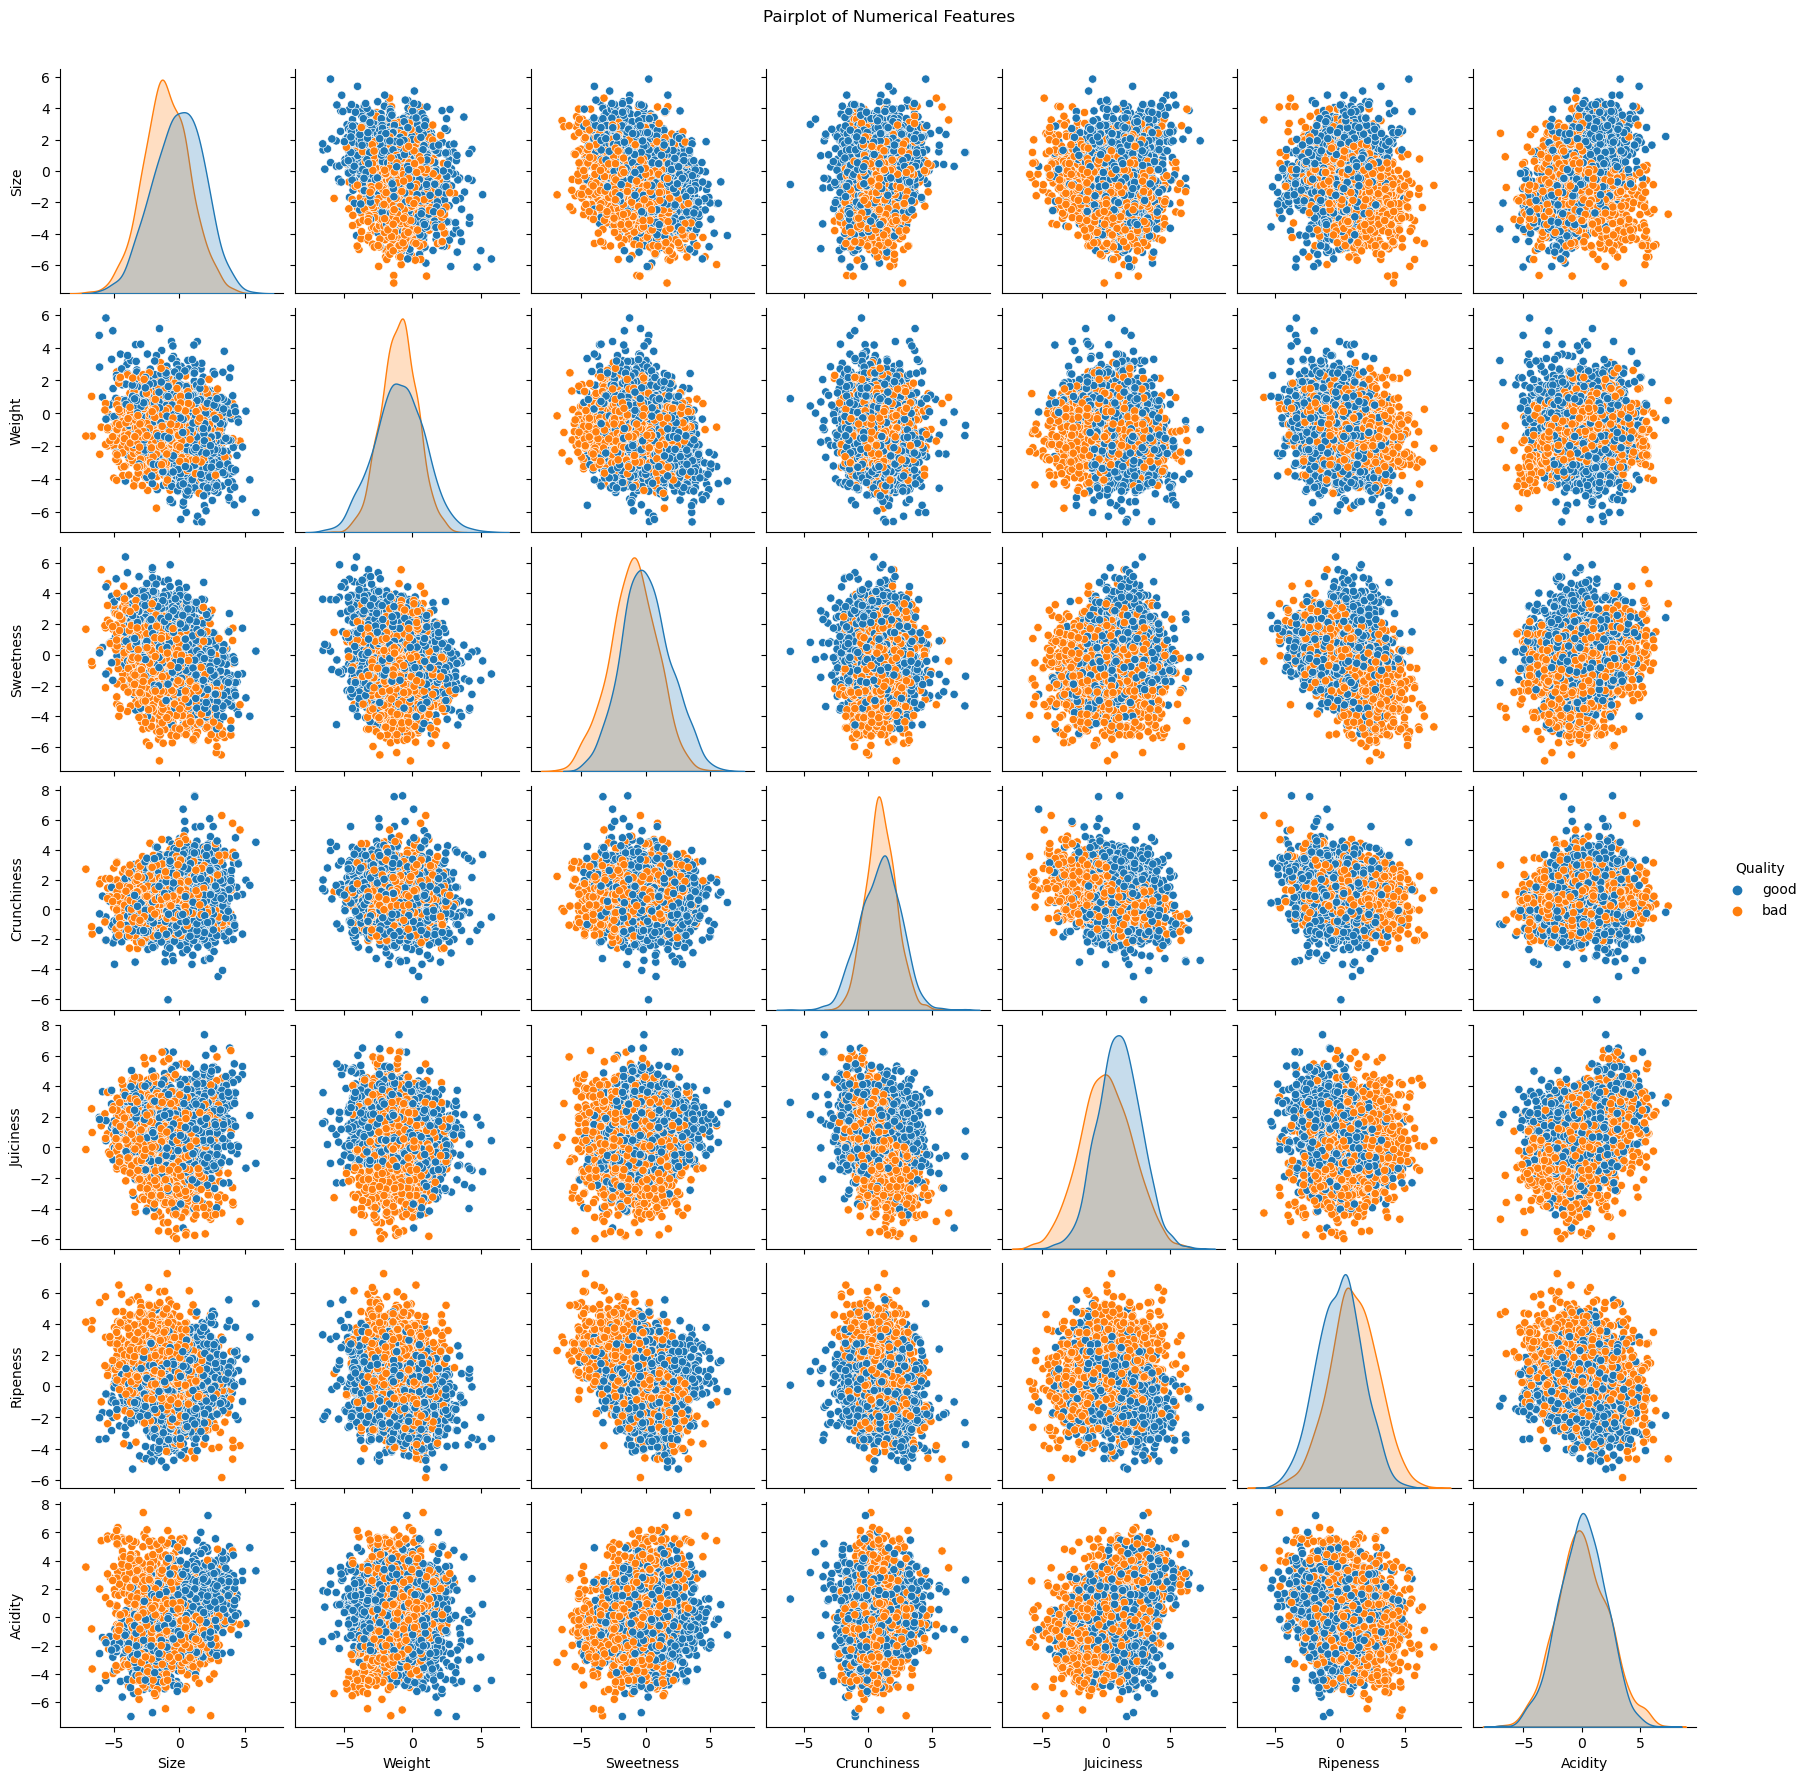

In [26]:
sns.pairplot(d_eda, hue='Quality', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

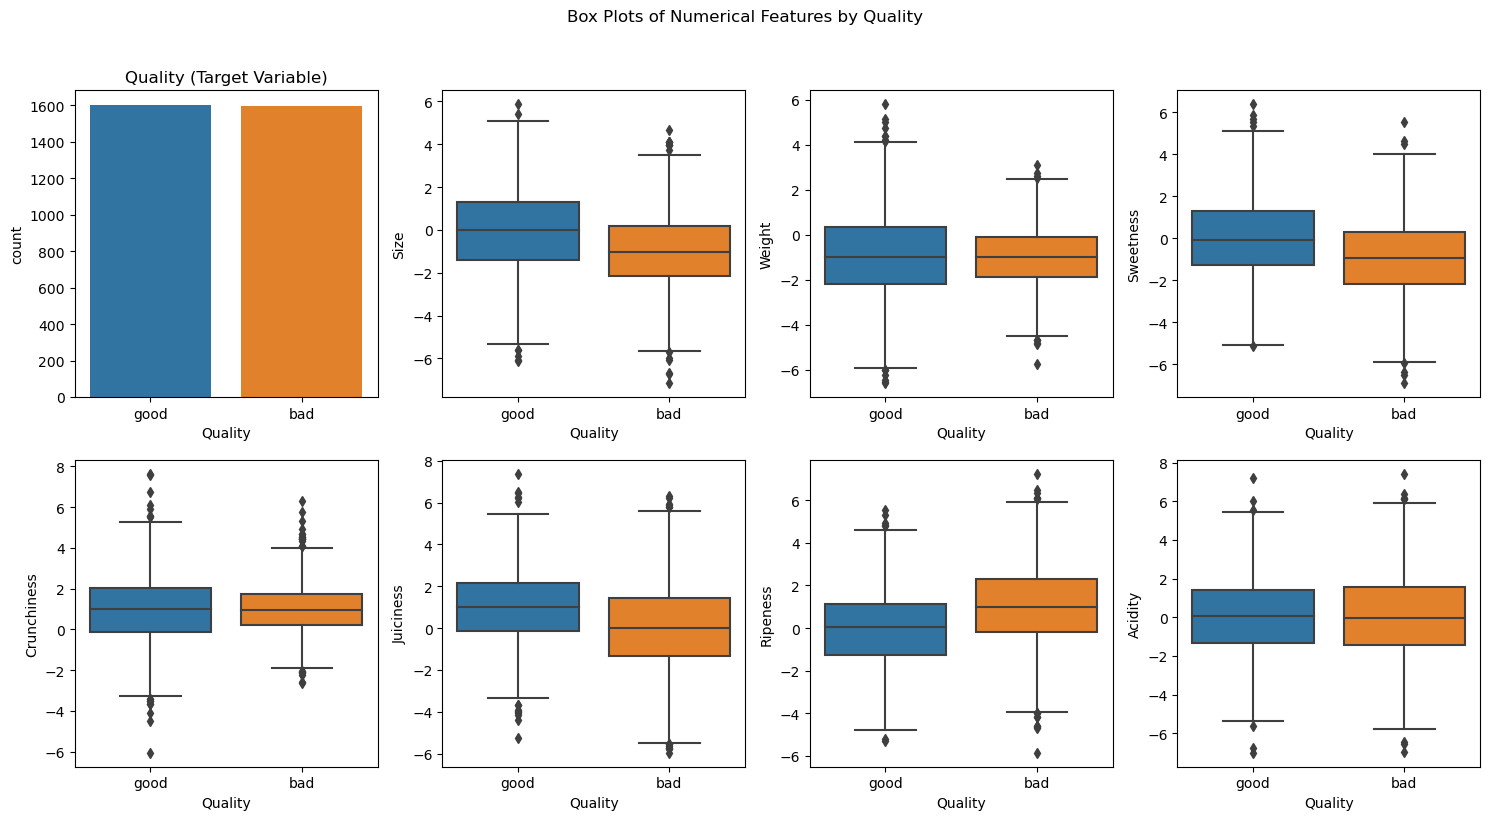

In [27]:

numeric_columns = d_eda.select_dtypes(include=['float64', 'int64']).columns

# Check the 'Quality' column separately
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# Countplot for 'Quality' (categorical variable)
sns.countplot(x='Quality', data=d_eda, ax=axes[0, 0])
axes[0, 0].set_title('Quality (Target Variable)')

# Boxplots for numeric features
for i, col in enumerate(numeric_columns, start=1):
    sns.boxplot(x='Quality', y=col, data=d_eda, ax=axes[i // 4, i % 4])

plt.suptitle('Box Plots of Numerical Features by Quality', y=1.02)
plt.tight_layout()
plt.show()


In [28]:
## we need to check whether each and every column is following gaussian distribution or not using qq plot or probplotfrom scipy.stats

Size


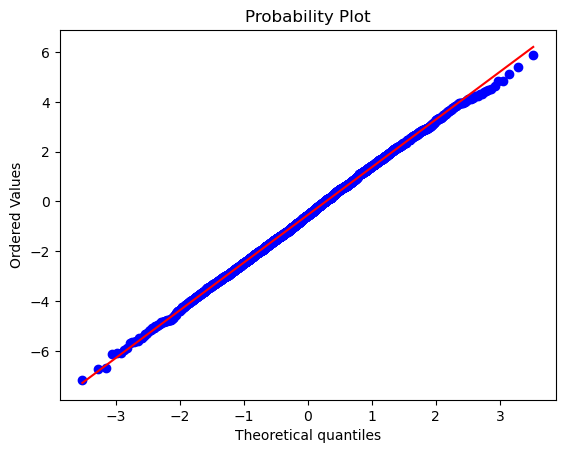

Weight


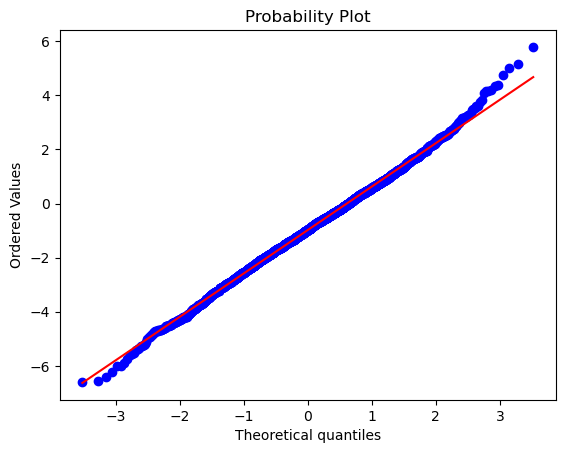

Sweetness


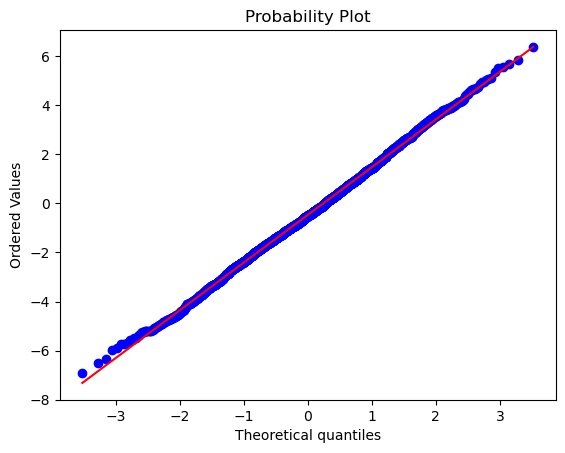

Crunchiness


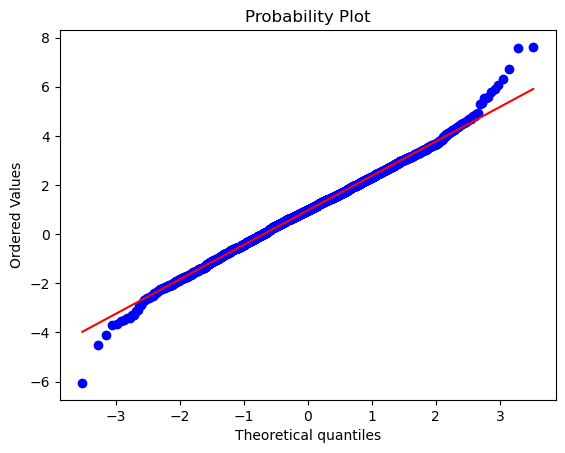

Juiciness


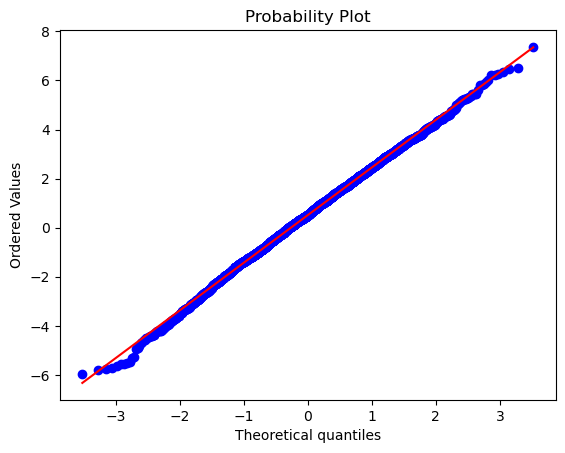

Ripeness


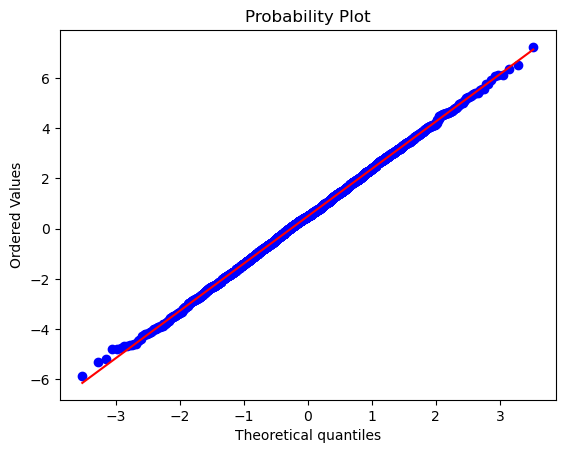

Acidity


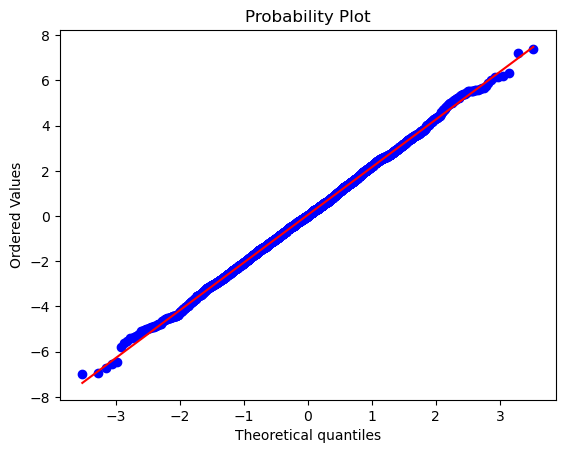

In [29]:
# using for loop to plot the probability plot to check whether they are following normal distribbution or not
for y in x_train.columns:
    plt.subplot(111)
    ss.probplot(x_train[y],dist='norm', fit=True, plot=plt)
    print(y)
    plt.show()

every feature is following Gaussian distribution

## Creating Pipeline

In [30]:
# seperating the numerical columns for creating pipelines
numerical_data=x_train.select_dtypes(include=["int64","float64"])

In [31]:
numerical_data

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
1042,0.148672,-1.497965,-0.314322,-0.840648,3.563195,-1.603539,1.791805
3279,1.762092,2.050866,-1.375059,2.988179,-0.353031,-1.025432,3.200821
3736,-0.386819,0.957507,-0.315931,3.380672,-1.908308,-2.620454,0.022230
3019,-0.452303,-0.367928,-1.517538,1.842541,1.201533,0.492245,-0.844720
1893,1.457536,-1.088102,-0.718263,-2.046923,2.717242,-0.235078,1.126991
...,...,...,...,...,...,...,...
3002,-1.123378,-1.396915,2.178745,1.077398,2.100609,0.293826,-0.600272
3243,1.572646,-0.281615,-4.380837,0.305577,2.274682,1.059189,-0.184645
35,-0.955402,-2.461097,-4.087156,0.839108,1.003216,4.975640,-0.981388
3207,-3.010790,-0.639898,-2.456271,-0.728441,0.553476,4.755782,-0.827881


In [32]:
# creating a pipeline for handling missing values which will be implemented by simple imputer class and strategy of imputing 
# is mean.and in the same pipeline used standard scalar for scaling
nup=Pipeline([("input_n",SimpleImputer()),("scaling",StandardScaler())])

In [33]:
# for transforming the columns columntransformer is used and inside pipeline is passed where we created to transform
col_tp=ColumnTransformer([("numerical",nup,numerical_data.columns)],remainder="passthrough")

In [34]:
col_tp

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('input_n', SimpleImputer()),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity'],
      dtype='object'))])

In [56]:
col_tp.get_feature_names_out()

array(['numerical__Size', 'numerical__Weight', 'numerical__Sweetness',
       'numerical__Crunchiness', 'numerical__Juiciness',
       'numerical__Ripeness', 'numerical__Acidity'], dtype=object)

## model creation/Training

In [37]:
# this is the transformed data to transform the train data by using column transformer pipeline 
fx_train=col_tp.fit_transform(x_train)

In [38]:
fx_train.shape

(3200, 7)

In [53]:
# transforms the test data           
fx_test=col_tp.transform(x_test)

In [57]:
# traing the model and testing 
gb=GaussianNB()
model=gb.fit(fx_train,y_train)
pred=model.predict(fx_test)
accuracy_score(y_test,pred)

0.7575

In [58]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       399
           1       0.75      0.77      0.76       401

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800



As the data is imbalanced data we need consider macro avg where it gives equal importance to both class labels.
the model is 76% confident that prediction is correct.

## Deployment

In [59]:
# this is the pipeline for preprocessing that can be used in final model 
finalp=Pipeline([("preprocessed",col_tp)])

In [60]:
finalp

Pipeline(steps=[('preprocessed',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('input_n',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity'],
      dtype='object'))]))])

In [62]:
# final gaussian naive bayes model for numerical data where this can be used for any model 
model=gb.fit(finalp.fit_transform(x_train),y_train)

In [65]:
# dumping the model

In [66]:
pickle.dump(finalp,open(r"C:\Users\LENOVO\Downloads\finalp_apple.pkl","wb"))
pickle.dump(model,open(r"C:\Users\LENOVO\Downloads\model_apple.pkl","wb"))